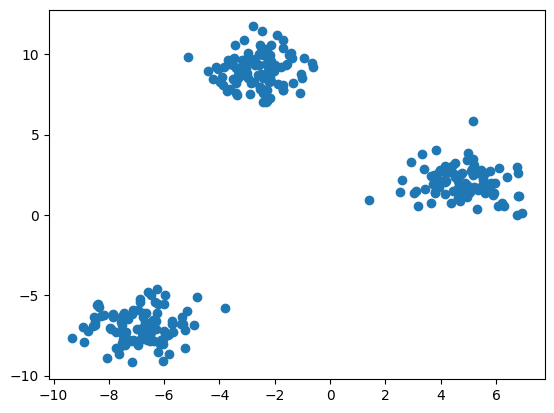

In [16]:
# k-means 구현, sklearn 활용

# 데이터 만들기
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
# X, y = make_moons(n_samples=300, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [20]:
# K-means
import numpy as np
from numpy.linalg import norm

class KMeans:
    def __init__(self, n_clusters, max_iter=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None # 분산 값

    def fit(self, X):
        # 초기 중심점 설정
        # X의 개수 중 설정한 클러스터(k)의 갯수에 따라 중복없이 뽑음
        self.cluster_centers_ = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]
        print(X[np.random.choice(range(len(X)), self.n_clusters, replace=False)])
        for i in range(self.max_iter):
          # 각 데이터 포인트와 중심점 사이의 거리 계산 및 할당
          distance = norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
          self.labels_ = np.argmin(distance, axis=1)

          # 새로운 중심점 계산
          cluster_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

          # 변화가 없을 경우 종료
          if np.all(self.cluster_centers_ == cluster_centers):
              break
          # 변화가 있으면 새로운 클러스터를 사용
          self.cluster_centers_ = cluster_centers

        # 분산 계산
        self.inertia_ = np.sum(distance[np.arange(len(self.labels_)), self.labels_] ** 2)


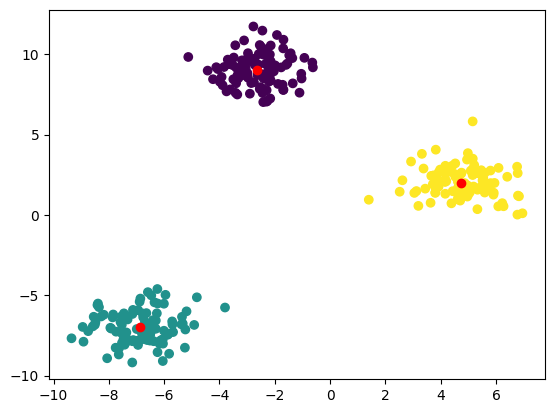

In [ ]:
# 테스트
  model = KMeans(n_clusters=3)
  model.fit(X)

  plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')
  plt.show()

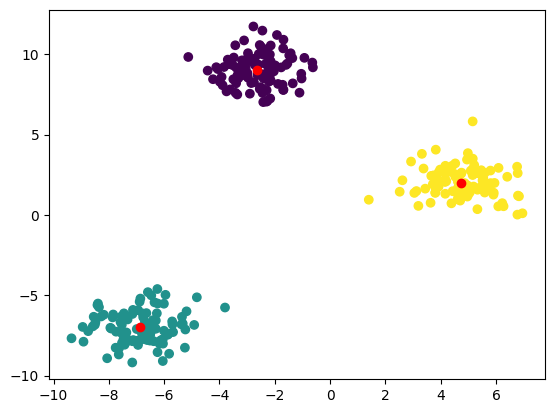

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')
plt.show()

In [ ]:
from PIL import Image

img = Image.open('image.jpg')

k = 10
pixels = np.array(img).reshape(-1, 3)
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# k개의 색으로만 그림 다시 그리기
for i in zip(range(pixels.shape[0])):
  label = kmeans.labels_[i]
  pixels[i] = kmeans.cluster_centers_[label]

new_img_arr = pixels.reshape(img.height, img.width, 3)
plt.imshow(new_img_arr)
plt.show()

# 새로운 그림을 파일로 저장
new_img = Image.fromarray(new_img_arr, 'RGB')
new_img.save('new_image.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/image.jpg'